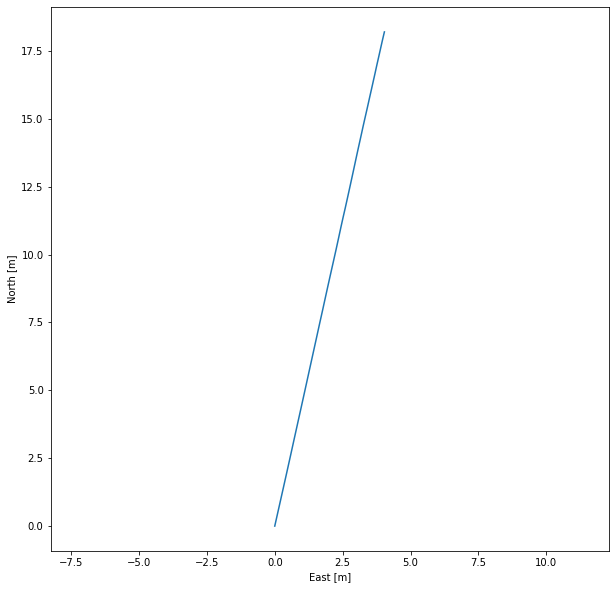

In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import scipy
from scipy.io import savemat
# from helpers import imu
# from matplotlib import cm

# pick difficulty
load_path = "./drives/easy/"
# load_path = "./drives/medium/"
# load_path = "./drives/hard/"

frames = np.load(load_path + "data.npy", allow_pickle=True) # list of dicts containing sycronized images lidar and imu
# [{"left_img": "", "right_img": "", "imu": [], "lidar": ""}, ...]
# imu is array like with
# the following structure
# [latitude, longitude, height, roll, pitch, azimuth, east_velocity, north_velocity, up_velocity]
imu_lon=[]
imu_lat=[]
for i, frame in enumerate(frames):
    imu_data = frame["imu"]
    imu_lon.append(imu_data[1])
    imu_lat.append(imu_data[0])

# set the longitude and latitude to be relative to the starting point
imu_lon_rel=imu_lon-imu_lon[0]
imu_lat_rel=imu_lat-imu_lat[0]
# set the x- and y-position in unit [m]
imu_lon_rel_m=imu_lon_rel*np.pi/180*6378100
imu_lat_rel_m=imu_lat_rel*np.pi/180*6378100

# save x- and y-position [m] to a .mat file
imu_mdic={'east':imu_lon_rel_m,'north':imu_lat_rel_m}  
scipy.io.savemat('carpose_imu_measurement.mat',imu_mdic)

plt.figure(figsize=(10, 10))
plt.plot(imu_lon_rel_m,imu_lat_rel_m)
plt.axis("equal")
plt.xlabel("East [m]")
plt.ylabel("North [m]")
plt.show()